In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("E:\Sem 2_project\ML\project\code\data.csv")
df

In [ ]:
x, y = df.x, df.y
plt.scatter(x,y, cmap=df.z)

In [ ]:
D = df.iloc[:,:2].to_numpy()
D

In [ ]:
# !pip install cvxpy

## Data set

In [ ]:
import numpy as np

# Define the dimensions
m, ni, no, r = 5, 3, 2, 4
M1, M2 = m, ni + no

# Create random matrices A, B, N
A = np.random.rand(m, ni)
B = np.random.rand(m, no)
N = np.random.rand(m, ni)

# Create a permutation matrix T
T = np.eye(M2)
np.random.shuffle(T)

# Concatenate B(A+N)
D = np.hstack((B, A + N))

# Apply the permutation matrix
D = np.dot(D, T)


In [ ]:
B,(A + N),D

## permutation Matrix

In [ ]:
import numpy as np

# Original matrix D
v = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

print("Original Matrix D:")
print(v)

# Permutation matrix T
t = np.array([[0, 1, 0],
              [0, 0, 1],
              [1, 0, 0]])

print("\nPermutation Matrix T:")
print(t)
print(v @ t.T)

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Sample Data Matrix D (Replace this with actual data)

# Step 1: Data Preprocessing
svd = TruncatedSVD(n_components=2);
Q = svd.fit_transform(D);
D_new = Q.T @ D;

# Normalizing l-2 norm (optional based on requirement)
column_norms = np.linalg.norm(D_new, axis=0);
D_new = D_new/column_norms;

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Sample Data Matrix D (Replace this with actual data)
D = np.random.rand(3, 3);                     print('>> D:\n', D)

# Step 1: Data Preprocessing
svd = TruncatedSVD(n_components=2);           print('\n>> svd object:\n', svd)
Q = svd.fit_transform(D);                     print('\n>> Q:\n', Q)
D_new = Q.T @ D;                              print('\n>> D_new (Q.T @ D):\n', D_new)

# Normalizing l-2 norm (optional based on requirement)
column_norms = np.linalg.norm(D_new, axis=0); print('\n>> column_norms:\n', column_norms)
D_new = D_new/column_norms;                   print('\n>> D_new:\n', D_new)

In [ ]:
U, S, Vh = np.linalg.svd(D, full_matrices=False, compute_uv=True)
display(U)
display(S)
display(Vh)

In [ ]:
import cvxpy as cp # ADMM solver
import numpy as np

# Assuming D_new is your data matrix after preprocessing (2,3)
M1, M2 = D_new.shape;                                             print('>> M1, M2:\n', D_new.shape)
# This should be the number of non-zero singular values
rd = M1;                                                          #print('\n>> rd:\n', M1)

# Variable to be solved for
C = cp.Variable((rd, M2));                                        #print('\n>> C:\n', C)

# Defining the constraints
constraints = [cp.diag(C.T @ D_new) == 1];                        #print('\n>> constraints:\n', constraints)

# Defining the objective function
objective = cp.Minimize(cp.norm(C.T @ D_new, 1));                 #print('\n>> objective:\n', objective)

# Defining the problem
problem = cp.Problem(objective, constraints);                     #print('\n>> problem:\n', problem)

# Solving the problem using ADMM solver
# Solving the problem using SCS solver (which uses ADMM)
problem.solve(solver=cp.SCS)

# problem.solve(solver=cp.ADMM)

# The optimal value for C
C_star = C.value;     print('\n>> C_star:\n', C.value)
print('\n>> C_star shape:\n', C_star.shape)

In [ ]:
import cvxpy as cp # ADMM solver
import numpy as np

# Assuming D_new is your data matrix after preprocessing (2,3)
M1, M2 = D.shape;                                             print('>> M1, M2:\n', D_new.shape)
# This should be the number of non-zero singular values
rd = M1;                                                          #print('\n>> rd:\n', M1)

# Variable to be solved for
C = cp.Variable((rd, M2));                                        #print('\n>> C:\n', C)

# Defining the constraints
constraints = [cp.diag(C.T @ D) == 1];                        #print('\n>> constraints:\n', constraints)

# Defining the objective function
objective = cp.Minimize(cp.norm(C.T @ D, 1));                 #print('\n>> objective:\n', objective)

# Defining the problem
problem = cp.Problem(objective, constraints);                     #print('\n>> problem:\n', problem)

# Solving the problem using ADMM solver
# Solving the problem using SCS solver (which uses ADMM)
problem.solve(solver=cp.SCS)

# problem.solve(solver=cp.ADMM)

# The optimal value for C
C_star = C.value;     print('\n>> C_star:\n', C.value)
print('\n>> C_star shape:\n', C_star.shape)

In [ ]:
# Compute the innovation values
x = 1 / np.linalg.norm(D.T @ C_star, axis=1);  print('>> x:\n', x)

# $\text{3.1 An Illustrative Example for Innovation Value}$

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Sample Data Matrix D (Replace this with actual data)
D = np.random.rand(20, 250);                     print('>> D:\n', D)

# Step 1: Data Preprocessing
svd = TruncatedSVD(n_components=250);           print('\n>> svd object:\n', svd)
Q = svd.fit_transform(D);                     print('\n>> Q:\n', Q)
D_new = Q.T @ D;                              print('\n>> D_new (Q.T @ D):\n', D_new, D_new.shape)

# Normalizing l-2 norm (opti`onal based on requirement)
column_norms = np.linalg.norm(D_new, axis=0); print('\n>> column_norms:\n', column_norms)
D_new = D_new/column_norms;                   print('\n>> D_new:\n', D_new, D_new.shape)

In [ ]:
D_new.shape

In [ ]:
import cvxpy as cp # ADMM solver
import numpy as np

# Assuming D_new is your data matrix after preprocessing (2,3)
M1, M2 = D_new.shape;                                             print('>> M1, M2:\n', D_new.shape)
# This should be the number of non-zero singular values
rd = M1;                                                          #print('\n>> rd:\n', M1)

# Variable to be solved for
C = cp.Variable((rd, M2));                                        #print('\n>> C:\n', C)

# Defining the constraints
constraints = [cp.diag(C.T @ D_new) == 1];                        #print('\n>> constraints:\n', constraints)

# Defining the objective function
objective = cp.Minimize(cp.norm(C.T @ D_new, 1));                 #print('\n>> objective:\n', objective)

# Defining the problem
problem = cp.Problem(objective, constraints);                     #print('\n>> problem:\n', problem)

# Solving the problem using ADMM solver
# Solving the problem using SCS solver (which uses ADMM)
problem.solve(solver=cp.SCS)

# problem.solve(solver=cp.ADMM)

# The optimal value for C
C_star = C.value;     print('\n>> C_star:\n', C.value)
print('\n>> C_star shape:\n', C_star.shape)

In [ ]:
min(C_star[0]), max(C_star[0]), min(C_star[1]), max(C_star[1]), min(C_star[2]), max(C_star[2])

In [ ]:
# Compute the innovation values
x = 1 / np.linalg.norm(D_new.T @ C_star, axis=1);  print('>> x:\n', x)

In [ ]:
plt.figure(figsize=(19,5))

plt.subplot(1,2,1)
plt.stem(np.arange(0,250), (C_star.T @ D_new)[:,0], linefmt ='blue', markerfmt ='D')

plt.subplot(1,2,2)
plt.stem(np.arange(0,250), x, linefmt ='blue', markerfmt ='D')

##

# $\text{3.1 Synthetic numerical example}$

In [2]:
!pip install seaborn

     |████████████████████████████████| 294 kB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 35.9 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 36.5 MB/s eta 0:00:01
     |████████████████████████████████| 18.2 MB 145.8 MB/s eta 0:00:01
     |████████████████████████████████| 310 kB 148.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 132.3 MB/s eta 0:00:01
     |████████████████████████████████| 345 kB 138.9 MB/s eta 0:00:01
     |████████████████████████████████| 229 kB 148.9 MB/s eta 0:00:01


In [4]:
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.decomposition import TruncatedSVD

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# Create random matrices A, B, N
A = np.random.rand(20, 200);                     #print(f'>> A{A.shape}:\n', A)
B = 100*np.random.rand(20, 50);                   #print(f'>> B{B.shape}:\n', B)
N = 0.9*np.random.rand(20, 200);

# Concatenate B(A+N)
D = np.hstack((B, A + N));   print(f'>> D{D.shape}:\n')

>> D(20, 250):



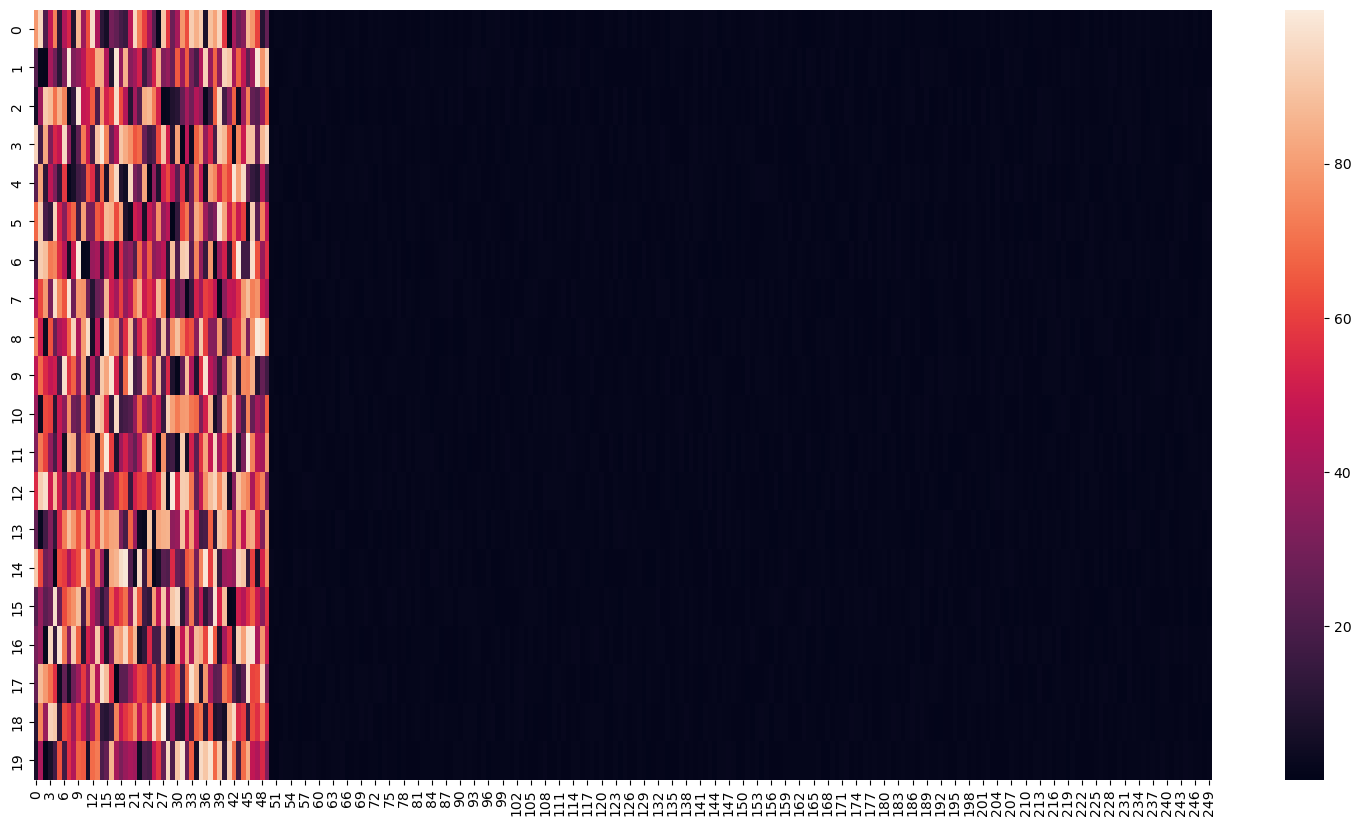

In [ ]:
# plotting the heatmap 
plt.figure(figsize=(19,10))
hm = sn.heatmap(data = D)

In [ ]:
D.shape

(20, 250)

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Step 1: Data Preprocessing
svd = TruncatedSVD(n_components=250);         #  print('\n>> svd object:\n', svd)
Q = svd.fit_transform(D);                    # print('\n>> Q:\n', Q)
D_new = Q.T @ D;                             # print('\n>> D_new (Q.T @ D):\n', D_new, D_new.shape)

# Normalizing l-2 norm (opti`onal based on requirement)
# column_norms = np.linalg.norm(D_new, axis=0); #print('\n>> column_norms:\n', column_norms)
# D_new = D_new/column_norms;                   #print('\n>> D_new:\n', D_new, D_new.shape)

print(f'>> D_new{D_new.shape}')

ValueError: n_components must be < n_features; got 250 >= 250

In [ ]:
# plotting the heatmap 
plt.figure(figsize=(19,10))
hm = sn.heatmap(data = D_new)

In [ ]:
import cvxpy as cp # ADMM solver

# Assuming D_new is your data matrix after preprocessing (2,3)
M1, M2 = D_new.shape;                                             #print('>> M1, M2:\n', D_new.shape)
# This should be the number of non-zero singular values
rd = M1;                                                          #print('\n>> rd:\n', M1)

# Variable to be solved for
C = cp.Variable((rd, M2));                                        #print('\n>> C:\n', C)

# Defining the constraints
constraints = [cp.diag(C.T @ D_new) == 1];                        #print('\n>> constraints:\n', constraints)

# Defining the objective function
objective = cp.Minimize(cp.norm(C.T @ D_new, 1));                 #print('\n>> objective:\n', objective)

# Defining the problem
problem = cp.Problem(objective, constraints);                     #print('\n>> problem:\n', problem)

# Solving the problem using ADMM solver
# Solving the problem using SCS solver (which uses ADMM)
problem.solve(solver=cp.SCS)

# problem.solve(solver=cp.ADMM)

# The optimal value for C
C_star = C.value;     #print('\n>> C_star:\n', C.value)
print('\n>> C_star shape:\n', C_star.shape)

In [ ]:
# Compute the innovation values
x = 1 / np.linalg.norm(D_new.T @ C_star, axis=1);  print('>> x:\n', x)
print(f'>> x{x.shape}')

In [ ]:
plt.plot(x)

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(19,5))

plt.subplot(1,3,1)
plt.stem(np.arange(0,250), np.hstack([(C_star.T @ D_new)[0,:50], np.zeros(200)]), linefmt ='blue', markerfmt ='+')

plt.subplot(1,3,2)
plt.stem(np.arange(0,250), (C_star.T @ D_new)[0,:], linefmt ='blue', markerfmt ='+')

plt.subplot(1,3,3)
plt.stem(np.arange(0,250), x, linefmt ='blue', markerfmt ='+')

In [ ]:
D_new.shape

In [ ]:
import pandas as pd
pd.DataFrame(D_new)

In [ ]:
# importing the modules 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 

# generating 2-D 10x10 matrix of random numbers 
# from 1 to 100 
data = D_new
print("The data to be plotted:\n") 
print(data) 

# plotting the heatmap 
plt.figure(figsize=(19,10))
hm = sn.heatmap(data = data) 


# displaying the plotted heatmap 
plt.show()
